<a href="https://colab.research.google.com/github/Elwing-Chou/ximen1129/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/ximen1129/raw/main/train.csv"
urlretrieve(url, "train.csv")
url = "https://github.com/Elwing-Chou/ximen1129/raw/main/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7ff347c9d290>)

In [80]:
import pandas as pd
train = pd.read_csv("train.csv", encoding="utf-8")
test = pd.read_csv("test.csv", encoding="utf-8")
pid = test["PassengerId"]

In [81]:
datas = pd.concat([train, test], axis=0, ignore_index=True)
datas = datas.drop(["PassengerId", "Survived"], axis=1)

In [82]:
b = int
b(5.2)

5

In [83]:
def add(n1, n2, d=2):
    new = round(n1 + n2, d)
    return new
print(add(3.12323, 5.123132))
print(add(3.12323, 5.123132, d=5))

8.25
8.24636


In [84]:
def test():
    return add
test()(3.123, 5)

8.12

In [85]:
# demo
name = "Braund, Mr. Owen Harris"
name.split(",")[-1].split(".")[0].strip()

'Mr'

In [86]:
# Series.apply: 對整行執行同一個操作
def nameflow(name):
    return name.split(",")[-1].split(".")[0].strip()
# nameflow("Braund, Mr. Owen Harris")
datas["Name"] = datas["Name"].apply(nameflow)
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,Dona,female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,Mr,male,NaN,0,0,359309,8.0500,NaN,S


In [87]:
def cabinflow(cabin):
    if pd.isna(cabin):
        return cabin
    else:
        return cabin[0]
datas["Cabin"] = datas["Cabin"].apply(cabinflow)
datas["Cabin"].value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Cabin, dtype: int64

In [88]:
dic = datas["Ticket"].value_counts()
def ticketflow(ticket):
    if pd.isna(ticket):
        return ticket
    else:
        return dic[ticket]
datas["Ticket"] = datas["Ticket"].apply(ticketflow)

In [89]:
s = datas.isna().sum()
# pandas: dataframe/series[跟你資料筆數一樣多的一個t/f list]
s[s != 0].sort_values(ascending=False)

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [90]:
# filter的實驗
df = pd.DataFrame([
 [1, 2],
 [3, 4]     
])
df[[True, True]]

,0,1
0,1,2
1,3,4


In [91]:
# 拿某幾行
df = pd.DataFrame([
 [1, 2, 5],
 [3, 4, 6]     
], columns=["a", "b", "c"])
df[["a", "c"]]

,a,c
0,1,5
1,3,6


In [92]:
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,NaN,0,0,1,8.0500,NaN,S
1305,1,Dona,female,39.0,0,0,3,108.9000,C,C
1306,3,Mr,male,38.5,0,0,1,7.2500,NaN,S
1307,3,Mr,male,NaN,0,0,1,8.0500,NaN,S


In [93]:
# 類別型態補植
most = datas["Embarked"].value_counts().idxmax()
datas["Embarked"] = datas["Embarked"].fillna(most)

In [94]:
# 數字形態補植
med = datas.median().drop(["Pclass"])
datas = datas.fillna(med)

In [95]:
# see again
s = datas.isna().sum()
# pandas: dataframe/series[跟你資料筆數一樣多的一個t/f list]
s[s != 0].sort_values(ascending=False)

Cabin    1014
dtype: int64

In [96]:
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,28.0,0,0,1,8.0500,NaN,S
1305,1,Dona,female,39.0,0,0,3,108.9000,C,C
1306,3,Mr,male,38.5,0,0,1,7.2500,NaN,S
1307,3,Mr,male,28.0,0,0,1,8.0500,NaN,S


In [97]:
# 把出現率太稀少的刪除
c = datas["Name"].value_counts()
reserved = c[c > 50].index
def nameflow2(mid):
    if mid in reserved:
        return mid
    else:
        return None
datas["Name"] = datas["Name"].apply(nameflow2)

In [98]:
# one-hot
datas = pd.get_dummies(datas)
datas = pd.get_dummies(datas, columns=["Pclass"])
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [99]:
# demo 1
s = pd.Series([1, 2, 3, 4])
fil = [True, False, True, True]
fil = s >= 2
def test(n):
    if n == 2:
        return True
    else:
        return False
fil = s.apply(test)
s[fil]

# demo 2
fil = datas["Age"] > 50
datas[fil]

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
6,54.0,0,0,2,51.8625,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0
11,58.0,0,0,1,26.5500,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
15,55.0,0,0,1,16.0000,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
33,66.0,0,0,1,10.5000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
54,65.0,0,1,2,61.9792,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,59.0,2,0,2,51.4792,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
1265,54.0,1,1,3,81.8583,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
1269,55.0,0,0,1,50.0000,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0
1278,57.0,0,0,1,13.0000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [100]:
datas["Family"] = datas["SibSp"] + datas["Parch"]
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [101]:
# 取列: .iloc -> [第一列, 第二列...]
x = datas.iloc[:len(train)]
y = train["Survived"]
x_predict = datas.iloc[len(train):]

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
params = {
    "n_estimators":range(11, 150, 2),
    "max_depth":[4, 5, 6, 7, 8]
}
clf = RandomForestClassifier()
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
# search.fit(x, y)

In [104]:
# print(search.best_score_)
# print(search.best_params_)

In [105]:
import numpy as np
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=27, max_depth=6)
scores = cross_val_score(clf, x, y, cv=10, n_jobs=-1)
print(scores)
print(np.average(scores))

[0.82222222 0.82022472 0.75280899 0.86516854 0.85393258 0.80898876
 0.83146067 0.7752809  0.86516854 0.82022472]
0.8215480649188514


In [118]:
clf = RandomForestClassifier(n_estimators=27, max_depth=6)
clf.fit(x, y)
pre = clf.predict(x_predict)
df = pd.DataFrame({
    "PassengerId":pid,
    "Survived":pre
})
df.to_csv("rf.csv", encoding="utf-8", index=False)
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
imp = pd.DataFrame(clf.feature_importances_,
           index=datas.columns,
           columns=["Importance"])
imp.sort_values(by="Importance", ascending=False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(y=train["Sex"], hue=train["Survived"])

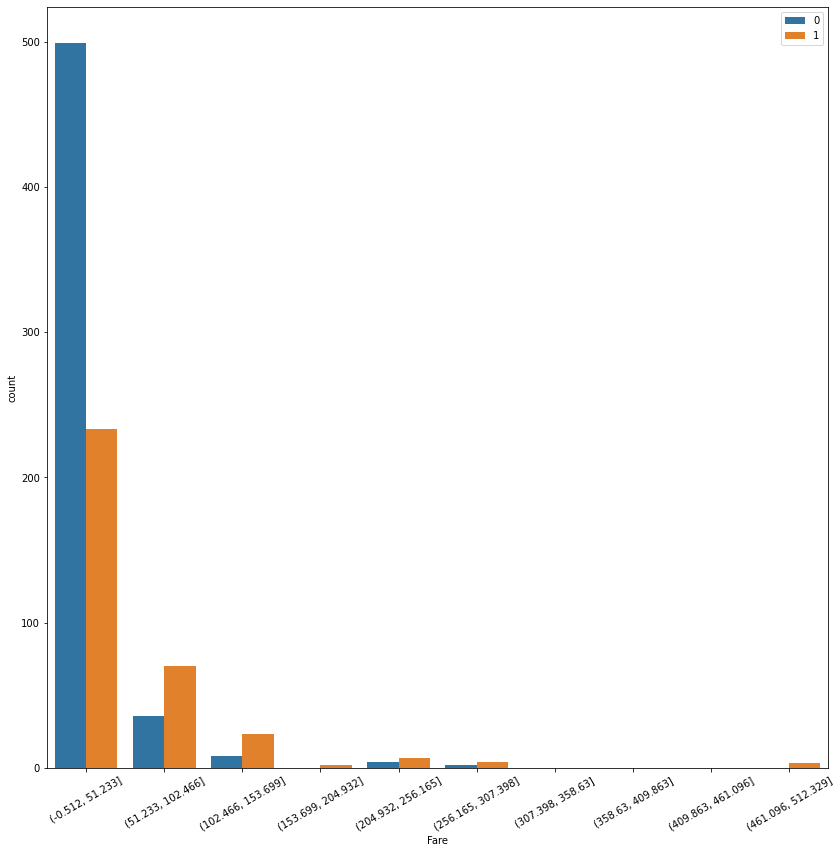

In [131]:
c = pd.cut(train["Fare"], bins=10)
plt.figure(figsize=(14, 14))
sns.countplot(x=c, hue=train["Survived"])
plt.xticks(rotation=30)
plt.legend(loc="upper right")

In [127]:
# KNN
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datas_scale = scaler.fit_transform(datas)
datas_scale = pd.DataFrame(datas_scale, columns=datas.columns)
datas_scale

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,0.273456,0.125,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.1
1,0.473882,0.125,0.000000,0.1,0.139136,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.1
2,0.323563,0.000,0.000000,0.0,0.015469,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.436302,0.125,0.000000,0.1,0.103644,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.1
4,0.436302,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1305,0.486409,0.000,0.000000,0.2,0.212559,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1306,0.480145,0.000,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1307,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [112]:
# 取列: .iloc -> [第一列, 第二列...]
x_scale = datas_scale.iloc[:len(train)]
x_predict_scale = datas_scale.iloc[len(train):]

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
params = {
    "n_neighbors":range(2, 100)
}
clf = KNeighborsClassifier()
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
search.fit(x_scale, y)
print(search.best_score_)
print(search.best_params_)

0.832796504369538
{'n_neighbors': 7}


In [117]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_scale, y)
pre = clf.predict(x_predict_scale)
df = pd.DataFrame({
    "PassengerId":pid,
    "Survived":pre
})
df.to_csv("knn.csv", encoding="utf-8", index=False)
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
